## The following is the visualization of the information regarding rides from April to September 2014, of the popular ride-hailing company, Uber.

# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

# Reading data of 6 months(Apr-Sep) and merging them

In [2]:
d1 = pd.read_csv('./Uber-dataset/uber-raw-data-apr14.csv')
d2 = pd.read_csv('./Uber-dataset/uber-raw-data-may14.csv')
d3 = pd.read_csv('./Uber-dataset/uber-raw-data-jun14.csv')
d4 = pd.read_csv('./Uber-dataset/uber-raw-data-jul14.csv')
d5 = pd.read_csv('./Uber-dataset/uber-raw-data-aug14.csv')
d6 = pd.read_csv('./Uber-dataset/uber-raw-data-sep14.csv')
data=pd.concat([d1, d2, d3, d4, d5, d6])
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Splitting the Date/Time column

In [3]:
data['Date/Time']= pd.to_datetime(data['Date/Time'])
data['Hour']=data['Date/Time'].dt.hour
data['Month']=data['Date/Time'].dt.month
data['Day']=data['Date/Time'].dt.day
data['Year']=data['Date/Time'].dt.year
data['DayName']=data['Date/Time'].dt.day_name()
data.head()

,Date/Time,Lat,Lon,Base,Hour,Month,Day,Year,DayName
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,4,1,2014,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,4,1,2014,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,4,1,2014,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,4,1,2014,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,4,1,2014,Tuesday


# Visualization
## 1. Bar graphs

### Rides in each hour over 6 months

In [4]:
hourly_ride_data = data.groupby(['Hour'])['Date/Time'].count().reset_index()
hourly_ride_data = hourly_ride_data.rename(columns = {'Date/Time':'ride_count'})
hourly_ride_data.head()

,Hour,ride_count
0,0,103836
1,1,67227
2,2,45865
3,3,48287
4,4,55230


In [5]:
hourly_ride_data.count()

Hour          24
ride_count    24
dtype: int64

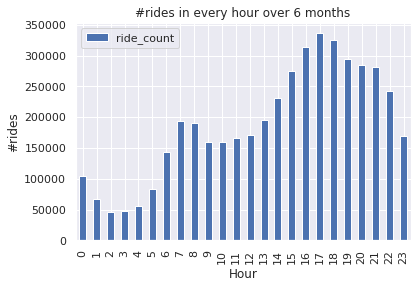

In [6]:
hourly_ride_data.plot.bar(x="Hour", y="ride_count", title="#rides in every hour over 6 months").set_ylabel("#rides")
plt.show(block=True)

### Rides in each hour split across the 6 months

In [7]:
hourMonth_ride_data = data.groupby(['Hour','Month'])['Date/Time'].count().reset_index()
hourMonth_ride_data = hourMonth_ride_data.rename(columns = {'Date/Time':'ride_count'})
hourMonth_ride_data.head()

,Hour,Month,ride_count
0,0,4,11910
1,0,5,13875
2,0,6,14514
3,0,7,17953
4,0,8,21451


In [8]:
hourMonth_ride_data.count()

Hour          144
Month         144
ride_count    144
dtype: int64

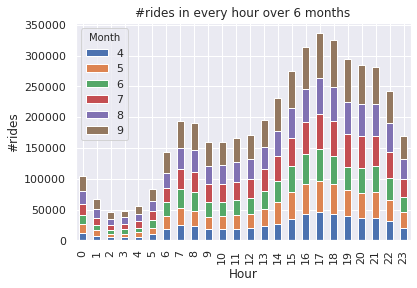

In [9]:
data.groupby(['Hour', 'Month']).size().unstack().plot(kind="bar",stacked=True, title="#rides in every hour over 6 months").set_ylabel("#rides")
plt.show(block=True)

### Rides on the same date of a month over 6 months

In [10]:
d_ride_data = data.groupby(['Day'])['Date/Time'].count().reset_index()
d_ride_data = d_ride_data.rename(columns = {'Date/Time':'ride_count'})
d_ride_data.head()

,Day,ride_count
0,1,127430
1,2,143201
2,3,142983
3,4,140923
4,5,147054


In [11]:
d_ride_data.count()

Day           31
ride_count    31
dtype: int64

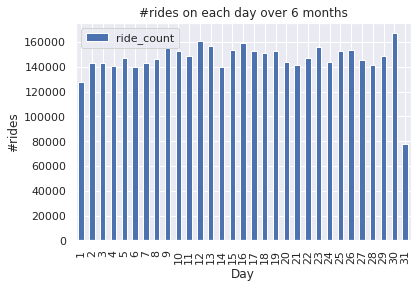

In [12]:
d_ride_data.plot.bar(x="Day", y="ride_count", title="#rides on each day over 6 months").set_ylabel("#rides")
plt.show(block=True)

### Rides on the same date of a month split across 6 months

In [13]:
dym_ride_data = data.groupby(['Day','Month'])['Date/Time'].count().reset_index()
dym_ride_data = dym_ride_data.rename(columns = {'Date/Time':'ride_count'})
dym_ride_data.head()

,Day,Month,ride_count
0,1,4,14546
1,1,5,23375
2,1,6,15967
3,1,7,21228
4,1,8,32353


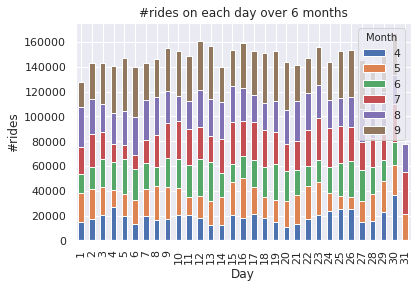

In [14]:
data.groupby(['Day', 'Month']).size().unstack().plot(kind="bar",stacked=True, title="#rides on each day over 6 months").set_ylabel("#rides")
plt.show(block=True)

### Rides on each day of a week over 6 months

In [15]:
weekday_ride_data = data.groupby('DayName')['Date/Time'].count().reset_index()
weekday_ride_data = weekday_ride_data.rename(columns = {'Date/Time':'ride_count'})
weekday_ride_data.head()

,DayName,ride_count
0,Friday,741139
1,Monday,541472
2,Saturday,646114
3,Sunday,490180
4,Thursday,755145


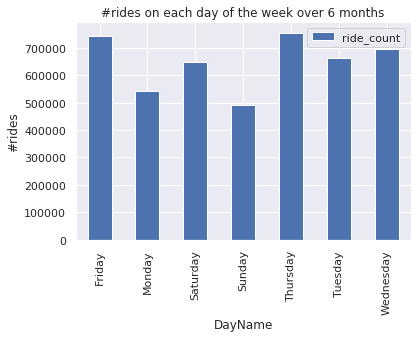

In [16]:
weekday_ride_data.plot.bar(x="DayName", y="ride_count", title="#rides on each day of the week over 6 months").set_ylabel("#rides")
plt.show(block=True)

### Rides on each day of a week split across 6 months

In [17]:
weekdym_ride_data = data.groupby(['DayName','Month'])['Date/Time'].count().reset_index()
weekdym_ride_data = weekdym_ride_data.rename(columns = {'Date/Time':'ride_count'})
weekdym_ride_data.head()

,DayName,Month,ride_count
0,Friday,4,90303
1,Friday,5,133991
2,Friday,6,105056
3,Friday,7,102735
4,Friday,8,148674


#### stacked bar graph

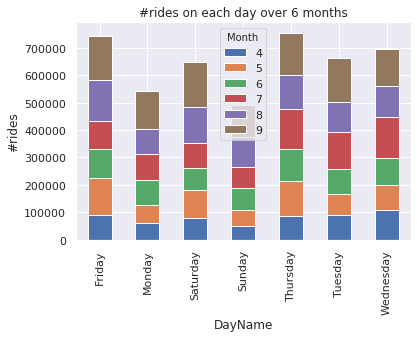

In [18]:
data.groupby(['DayName', 'Month']).size().unstack().plot(kind="bar",stacked=True, title="#rides on each day over 6 months").set_ylabel("#rides")
plt.show(block=True)

#### unstacked bar graph

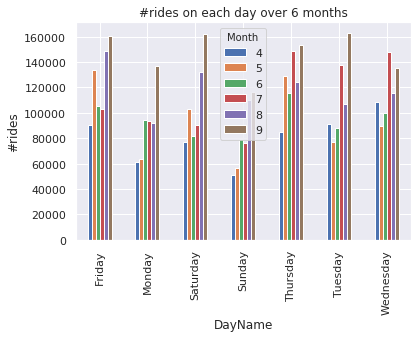

In [19]:
data.groupby(['DayName', 'Month']).size().unstack().plot(kind="bar",stacked=False, title="#rides on each day over 6 months").set_ylabel("#rides")
plt.show(block=True)

### total rides in each month

In [20]:
m_ride_data = data.groupby(['Month'])['Date/Time'].count().reset_index()
m_ride_data = m_ride_data.rename(columns = {'Date/Time':'ride_count'})
m_ride_data.head()

,Month,ride_count
0,4,564516
1,5,652435
2,6,663844
3,7,796121
4,8,829275


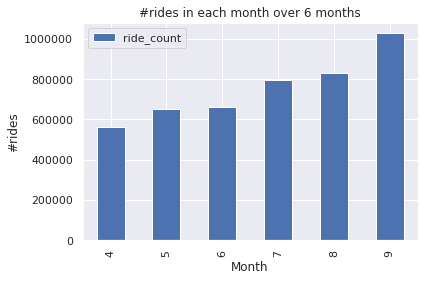

In [21]:
m_ride_data.plot.bar(x="Month", y="ride_count", title="#rides in each month over 6 months").set_ylabel("#rides")
plt.show(block=True)

### total rides in each base over 6 months

In [22]:
base_ride_data = data.groupby(['Base'])['Date/Time'].count().reset_index()
base_ride_data = base_ride_data.rename(columns = {'Date/Time':'ride_count'})
base_ride_data.head()

,Base,ride_count
0,B02512,205673
1,B02598,1393113
2,B02617,1458853
3,B02682,1212789
4,B02764,263899


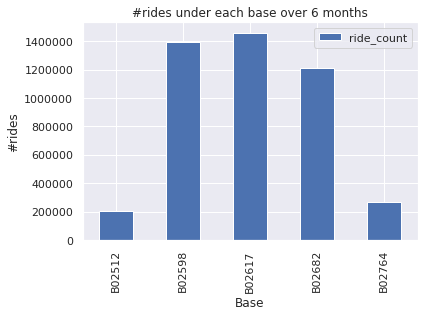

In [23]:
base_ride_data.plot.bar(x="Base", y="ride_count", title="#rides under each base over 6 months").set_ylabel("#rides")
plt.show(block=True)

### total rides in each base split across 6 months

In [24]:
bm_ride_data = data.groupby(['Base','Month'])['Date/Time'].count().reset_index()
bm_ride_data = bm_ride_data.rename(columns = {'Date/Time':'ride_count'})
bm_ride_data.head()

,Base,Month,ride_count
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472


#### stacked bar graph

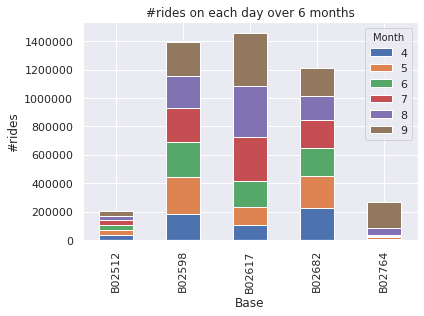

In [25]:
data.groupby(['Base', 'Month']).size().unstack().plot(kind="bar",stacked=True, title="#rides on each day over 6 months").set_ylabel("#rides")
plt.show(block=True)

#### unstacked bar graph

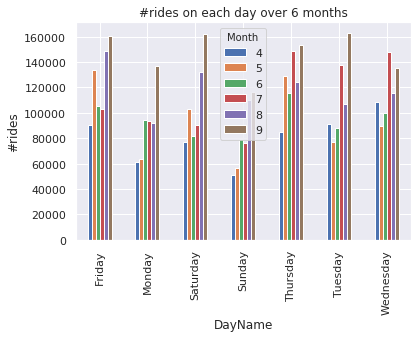

In [26]:
data.groupby(['DayName', 'Month']).size().unstack().plot(kind="bar",stacked=False, title="#rides on each day over 6 months").set_ylabel("#rides")
plt.show(block=True)

### total rides in each base over 6 months, split across each week day

In [27]:
bd_ride_data = data.groupby(['Base','DayName'])['Date/Time'].count().reset_index()
bd_ride_data = bd_ride_data.rename(columns = {'Date/Time':'ride_count'})
bd_ride_data.head()

,Base,DayName,ride_count
0,B02512,Friday,33319
1,B02512,Monday,25460
2,B02512,Saturday,26773
3,B02512,Sunday,20490
4,B02512,Thursday,35032


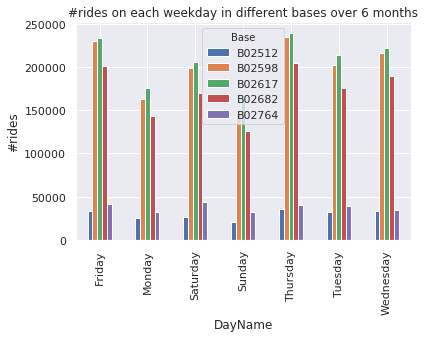

In [28]:
data.groupby(['DayName', 'Base']).size().unstack().plot(kind="bar",stacked=False, title="#rides on each weekday in different bases over 6 months").set_ylabel("#rides")
plt.show(block=True)

## 2. Heatmaps

### hour Vs day of a month

In [29]:
dh_ride_data = data.groupby(['Day', 'Hour'])['Date/Time'].count().reset_index()
dh_ride_data = dh_ride_data.rename(columns = {'Date/Time':'ride_count'})
dh_ride_data.head()

,Day,Hour,ride_count
0,1,0,3247
1,1,1,1982
2,1,2,1284
3,1,3,1331
4,1,4,1458


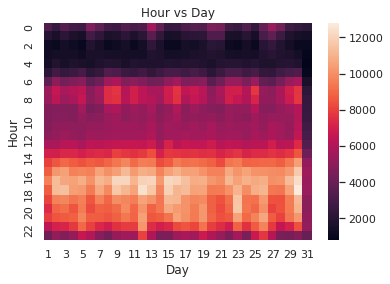

In [30]:
dh = dh_ride_data.pivot(index='Hour', columns='Day', values='ride_count')
sns.heatmap(dh)
plt.title('Hour vs Day')
plt.show()

### month Vs day of a month

In [31]:
dym_ride_data.head()

,Day,Month,ride_count
0,1,4,14546
1,1,5,23375
2,1,6,15967
3,1,7,21228
4,1,8,32353


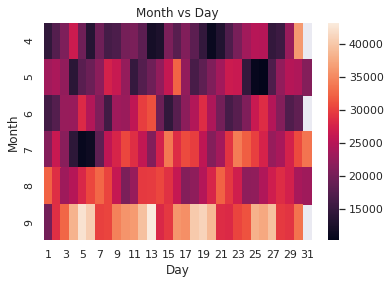

In [32]:
dm = dym_ride_data.pivot(index='Month', columns='Day', values='ride_count')
sns.heatmap(dm)
plt.title('Month vs Day')
plt.show()

### month Vs day of a week

In [33]:
weekdym_ride_data.head()

,DayName,Month,ride_count
0,Friday,4,90303
1,Friday,5,133991
2,Friday,6,105056
3,Friday,7,102735
4,Friday,8,148674


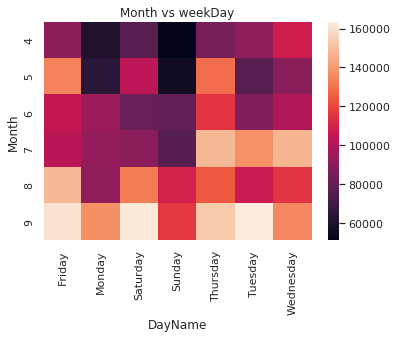

In [34]:
wdm = weekdym_ride_data.pivot(index='Month', columns='DayName', values='ride_count')
sns.heatmap(wdm)
plt.title('Month vs weekDay')
plt.show()

### month Vs base

In [35]:
bm_ride_data.head()

,Base,Month,ride_count
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472


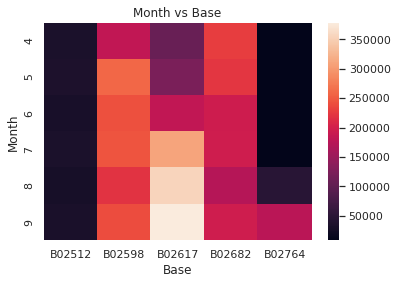

In [36]:
bm = bm_ride_data.pivot(index='Month', columns='Base', values='ride_count')
sns.heatmap(bm)
plt.title('Month vs Base')
plt.show()

### dya of a week Vs base

In [37]:
bd_ride_data.head()

,Base,DayName,ride_count
0,B02512,Friday,33319
1,B02512,Monday,25460
2,B02512,Saturday,26773
3,B02512,Sunday,20490
4,B02512,Thursday,35032


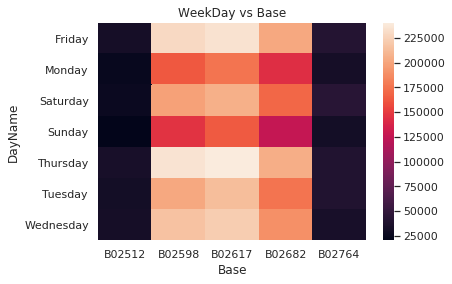

In [38]:
bd = bd_ride_data.pivot(index='DayName', columns='Base', values='ride_count')
sns.heatmap(bd)
plt.title('WeekDay vs Base')
plt.show()

## 3. Geo plots 

### total rides from Apr to Sep, 2014

/home/gayathri/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 71701 rows containing missing values.


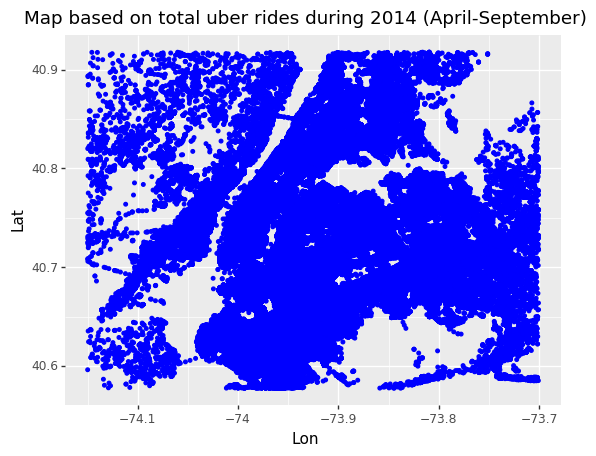

<ggplot: (8740829806729)>

In [39]:
min_lat = 40.5774
max_lat = 40.9176
min_long = -74.15
max_long = -73.7004

(ggplot(data, aes(x="Lon", y="Lat")) 
+geom_point(size=1, color = "blue")
+scale_x_continuous(limits=(min_long, max_long))
+scale_y_continuous(limits=(min_lat, max_lat))
+ggtitle("Map based on total uber rides during 2014 (April-September)"))

### total rides from Apr to Sep 2014, in each base

/home/gayathri/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 71701 rows containing missing values.


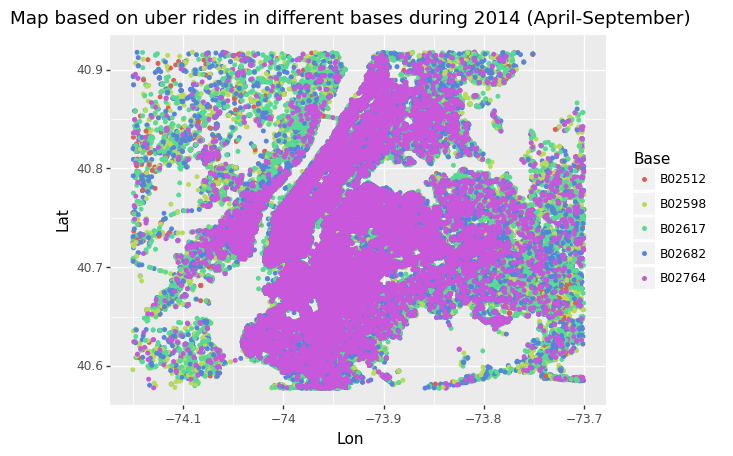

<ggplot: (8740829806777)>

In [40]:
(ggplot(data, aes(x="Lon", y="Lat", color = "Base"))
+geom_point(size=1) 
+scale_x_continuous(limits=(min_long, max_long))
+scale_y_continuous(limits=(min_lat, max_lat))
+ggtitle("Map based on uber rides in different bases during 2014 (April-September)"))